# WP1 Problem 2
### Author: John D'Angelo
### Fall 2018, University of Texas at Austin

In [2]:
#Import necessary libraries
import matplotlib.pyplot as plt
import numpy as np
import lasio
%matplotlib inline

In [2]:
#File names
wellLogData = "1_14-1_Composite.las"
wellDevSurvey = "1_14-1_deviation_mod.dev"

In [3]:
#Read Las file
las = lasio.read(wellLogData)
#depth data
depth = las['DEPTH']
#bulk mass density
bulkMassDensity = las['RHOB']
#correction for bulk mass density
bMDCorrection = las['DRHO']
#Correct bulk mass density
correctedBMD = bulkMassDensity+bMDCorrection

In [22]:
#Withdraw data from dev file
firstRow = True
Y=[]
X=[]
MD=[]
TVDSS=[]
with open(wellDevSurvey) as devFile:
    for row in devFile:
        if not firstRow:
            values = row.split()
            MD.append(float(values[0]))
            TVDSS.append(float(values[1]))
            X.append(float(values[2]))
            Y.append(float(values[3]))
            
        else:
            firstRow = False
MD = np.array(MD)
TVDSS = np.array(TVDSS)
X = np.array(X)
Y= np.array(Y)

In [23]:
#Interpolate MD in dev file against depth in las file to get TVDSS
#as function of depth values in log file
TVD_las = np.interp(depth,MD,TVDSS)

In [24]:
#We are told to assume an average bulk density of 2 g/cc between sea
#floor and beginning of density data
avgBMD = 2
#replace all nan values in corrected BMD value with this average
correctedBMD[np.where(np.isnan(correctedBMD))]= 2

In [25]:
#Part a, plot all available tracks with depth in the y-axis. I opted against setting
#axis limits for the x axis since we were not told to compare any of the tracks in this part.

#Enable output to pdf file
from matplotlib.backends.backend_pdf import PdfPages
pdf = PdfPages('AllAvailableTracks.pdf')
#Plot each track and add as a page to pdf
for entry in las.keys():
    if entry != "DEPTH":
        fig = plt.figure(figsize=(10,6))
        ax = fig.add_subplot(111)
        ax.plot(las[entry],depth)
        ax.set_ylabel('Depth [m]')
        ax.set_xlabel(entry + ' ['+las.header['Curves'][entry].unit + ']')
        ax.set_ylim([0,np.max(depth)+500])
        ax.invert_yaxis();
        ax.set_title("Log Data: "+entry)
        ax.grid();
        pdf.savefig()
        plt.close()
pdf.close()
#See pdf file in directory for plots

In [26]:
gravity = 9.81 #gravitational acceleration m/s2

#Part b, Calculate Vertical Stress
deltaZ = np.diff(TVD_las)
deltaZ = np.insert(deltaZ,0,0)
verticalStress = np.cumsum(correctedBMD*gravity*deltaZ)

#Part c, Calculate pore pressure
#Note that the TVDSS readings must be corrected to account for the
#104 [m] water height
correctedTVD = TVD_las-104
mudWeight = 1040
porePressure = mudWeight*gravity*correctedTVD
porePressure=porePressure*(1e-6)

(0, 100)

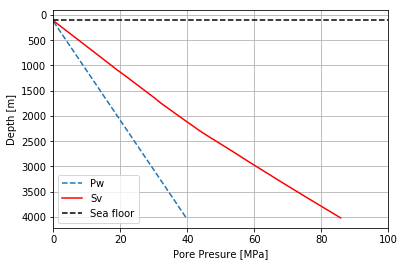

In [27]:
#Plot result
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(porePressure,depth,'--',label='Pw')
ax.plot(verticalStress*(0.001),depth,'r',label='Sv')
ax.plot([0,100],[104,104],'k--',label='Sea floor')
ax.legend()
ax.set_ylabel('Depth [m]')
ax.set_xlabel("Pore Presure [MPa]")
ax.invert_yaxis();
ax.grid();
ax.set_xlim([0,100])